**Exercises for K-Nearest Neighbors (KNN) and Logistic Regression**




# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


# **Exercise 1: Data Exploration and Preprocessing**

**1. Load and Explore the Data:**

In [ ]:
#load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

In [ ]:
#Display the first 10 rows
print(df.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [ ]:
#Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Descriptive statistics
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

**Task:**

Summarize the Dataset:

In [ ]:
# Number of instances and features
print(f'Instances: {df.shape[0]}, Features: {df.shape[1]}')
# Missing values
print(df.isnull().sum())

Instances: 569, Features: 33
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

Which features have the highest variance and might be the most important for
classification?

In [ ]:
numeric_data = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])

# Calculate variance for each feature
variances = numeric_data.var().sort_values(ascending=False)

# Show the top features with the highest variance
variances.head()

,0
area_worst,324167.385102
area_mean,123843.554318
area_se,2069.431583
perimeter_worst,1129.130847
perimeter_mean,590.440480


**2. Preprocessing:**

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [ ]:
# Convert diagnosis column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Normalize features
scaler = StandardScaler()
features = df.drop(columns=['diagnosis'])
scaled_features = scaler.fit_transform(features)

Task:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['diagnosis'], test_size=0.2, random_state=42)

# **Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model**

**1. Implement a KNN Classifier:**


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predict the test set
y_pred = knn.predict(X_test)

**Task:**

In [ ]:
#Calculate the accuracy of the KNN model.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315


In [ ]:
#Present the confusion matrix for the predictions.
print("Confusion matirx: \n" , confusion_matrix(y_test, y_pred))

Confusion matirx: 
 [[68  3]
 [ 3 40]]


**2. Experiment with Different Values of n_neighbors:**

In [ ]:
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred))

**Task:**

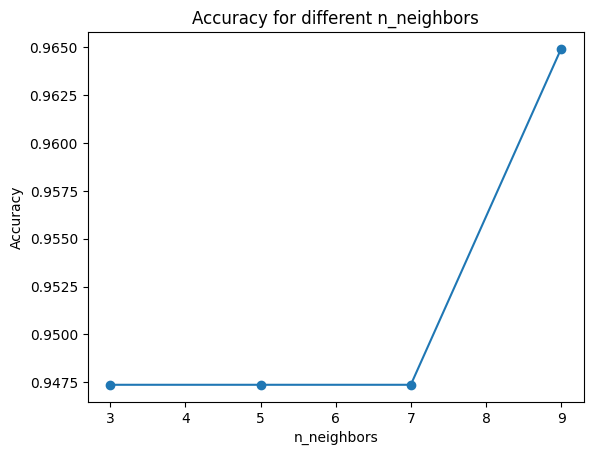

In [ ]:
#Plot a graph showing how accuracy changes with different values of n_neighbors
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy for different n_neighbors')
plt.show()

What is the optimal value of n_neighbors based on the accuracy?



---


The optimal value is 0.9475-0.9650

# **Exercise 3: Implementing Logistic Regression**

**1. Train Logistic Regression:**

In [ ]:
# Logistic Regression
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_lr = logistic.predict(X_test)

**Task:**

In [ ]:
#Calculate the accuracy of the Logistic Regression model.
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')

Accuracy: 0.9736842105263158


In [ ]:
#Present the confusion matrix and classification report (precision, recall, F1-score).
print("Confusion matrix: \n" , confusion_matrix(y_test, y_pred_lr))
print("\n Classification report: \n" , classification_report(y_test, y_pred_lr))

Confusion matrix: 
 [[70  1]
 [ 2 41]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**2. Comparison of KNN and Logistic Regression:**



Compare the performance (accuracy, precision, recall) of both models on the same dataset.

The Logistic regression model is have higher accuracy than KNN as logistic regression have 0.9736842105263158 accuracy while KNN have 0.9473684210526315 accuracy. In recall and precision, KNN have higher value as KNN's precision is 0.97 and have recall value of 0.99 while logistic regression have 0.98 precision and 0.95 recall.




**Task:**

**Which model performs better in terms of accuracy and F1-score?**

In average, logistic regression performs better than KNN


---


**Discuss which model you think is more appropriate for this classification problem and why.**

Logistic Regression, it's suitable for large datasets such as the given dataset for this model.

# **Exercise 4: Hyperparameter Tuning and Cross-Validation**

**1. Grid Search for Hyperparameter Tuning**

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

**Task:**

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


**2. Cross-Validation for Logistic Regression:**


In [ ]:
#k-fold cross-validation
cv_scores = cross_val_score(logistic, scaled_features, df['diagnosis'], cv=5)

**Task:**

In [ ]:
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.9806862288464524


# **Exercise 5: Decision Boundary Visualization**

**1. Visualizing the Decision Boundary:**

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

In [ ]:
# KNN and Logistic regression with PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, df['diagnosis'])
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_pca, df['diagnosis'])

LogisticRegression(max_iter=10000)

**Task:**

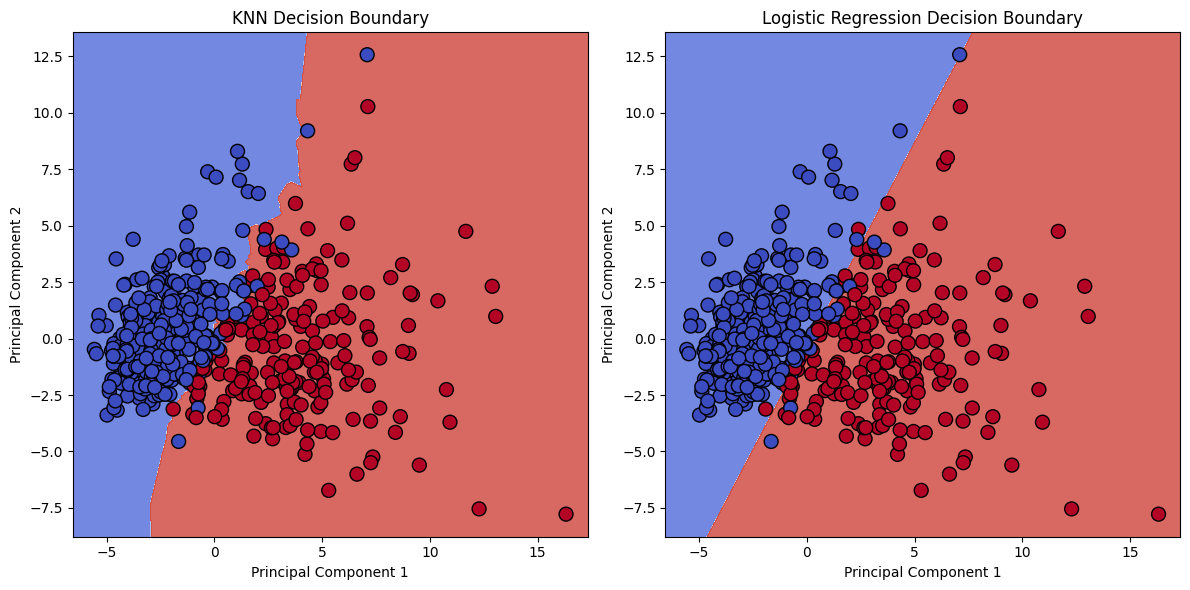

In [ ]:
# Create a meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the classes for each point in the grid for both models
Z_knn = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = logreg_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the grid shape
Z_knn = Z_knn.reshape(xx.shape)
Z_logreg = Z_logreg.reshape(xx.shape)

# Plot decision boundaries for both models
plt.figure(figsize=(12, 6))

# KNN decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_knn, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diagnosis'], edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Logistic Regression decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_logreg, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['diagnosis'], edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In this plot, we can visualize the different distribution of tumors where both models have different representaion. KNN midpoint have aalmost zigzag line compared to the logistic model that has striaght line.